In [1]:
#importer les packages nécessaires
import pandas as pd
import numpy as np

#les packages de visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#importer les packages de préparation de données
from sklearn.preprocessing import StandardScaler

#importer les packages de clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



C:\Users\vivie\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#import data
file_path = "https://raw.githubusercontent.com/MiliCod/Insights-Unveiled-A-Data-Driven-Exploration-of-Student-Stress-Factors/main/StressLevelDataset.csv"
df=pd.read_csv(file_path)
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [3]:
parametre1='peer_pressure'
parametre2="extracurricular_activities"
parametre3='bullying'

dfa=df[[parametre1,parametre2,parametre3]]
dfa



,peer_pressure,extracurricular_activities,bullying
0,3,3,2
1,4,5,5
2,3,2,2
3,4,4,5
4,5,0,5
...,...,...,...
1095,2,3,3
1096,3,4,3
1097,1,2,1
1098,4,4,4


In [4]:
#center and reduce our data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(dfa)
x_scaled

array([[ 0.18633396,  0.16424895, -0.40337716],
       [ 0.88827696,  1.57576339,  1.5570715 ],
       [ 0.18633396, -0.54150826, -0.40337716],
       ...,
       [-1.21755204, -0.54150826, -1.05686005],
       [ 0.88827696,  0.87000617,  0.90358861],
       [ 1.59021996, -1.24726548,  0.90358861]])

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\vivie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[3300.0,
 1322.2098197942655,
 937.3197328929463,
 793.5639320313496,
 693.1817820605522,
 617.961286228645,
 569.40056172554,
 525.6027428872505,
 463.6538499747948,
 410.4045861192862]

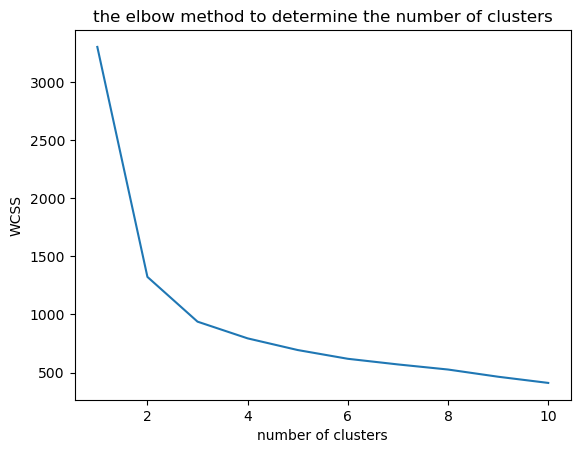

In [6]:
plt.plot(range(1, 11), wcss)
plt.title('the elbow method to determine the number of clusters')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans_etats = KMeans(n_clusters=3, init = 'k-means++')


In [8]:
kmeans_etats.fit(x_scaled)


KMeans(n_clusters=3)

In [9]:
clusters = kmeans_etats.predict(x_scaled)


In [10]:
dfa['cluster']=clusters
dfa

C:\Users\vivie\AppData\Local\Temp\ipykernel_20448\2827658313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['cluster']=clusters


,peer_pressure,extracurricular_activities,bullying,cluster
0,3,3,2,0
1,4,5,5,1
2,3,2,2,0
3,4,4,5,1
4,5,0,5,0
...,...,...,...,...
1095,2,3,3,0
1096,3,4,3,0
1097,1,2,1,2
1098,4,4,4,1


In [11]:
dfa_clusters = dfa.groupby(['cluster']).median().round(0)  
dfa_clusters

,peer_pressure,extracurricular_activities,bullying
cluster,,,
0,2.0,3.0,3.0
1,4.0,4.0,4.0
2,2.0,1.0,1.0


In [12]:
for i in range(4):
    print(f'Cluster {i}')
    print(dfa[dfa.cluster == i].index.tolist())
    print()

Cluster 0
[0, 2, 4, 8, 15, 18, 24, 28, 33, 35, 36, 48, 51, 54, 55, 56, 63, 64, 67, 68, 69, 78, 81, 84, 85, 86, 88, 90, 94, 95, 99, 100, 102, 103, 113, 116, 119, 123, 124, 125, 126, 128, 129, 131, 133, 134, 139, 141, 142, 144, 146, 148, 151, 152, 155, 157, 160, 163, 166, 168, 169, 172, 178, 182, 184, 186, 188, 191, 192, 193, 198, 199, 203, 210, 211, 213, 216, 217, 219, 221, 222, 225, 226, 227, 228, 229, 233, 237, 238, 240, 242, 243, 251, 253, 258, 261, 263, 264, 265, 266, 270, 275, 279, 286, 290, 293, 296, 297, 298, 301, 302, 307, 309, 311, 312, 313, 319, 325, 329, 330, 334, 336, 339, 341, 350, 351, 352, 357, 361, 362, 364, 366, 372, 373, 376, 379, 380, 383, 384, 386, 387, 390, 392, 396, 405, 408, 409, 410, 411, 412, 413, 414, 416, 420, 422, 424, 427, 431, 435, 438, 444, 452, 454, 455, 458, 462, 463, 471, 474, 476, 478, 481, 487, 489, 492, 493, 495, 496, 498, 506, 507, 509, 514, 515, 516, 519, 522, 524, 525, 528, 531, 532, 536, 546, 548, 549, 551, 553, 560, 561, 564, 565, 569, 570, 571,

In [13]:
# Assuming max_values contains the maximum values for each column in dfa
max_values = dfa[[parametre1, parametre2, parametre3]].max()




# Assuming target_columns is the list ['parametre1', 'parametre2', 'parametre3', 'parametre4']
values = {}
for column in dfa_clusters:
    try:
        user_input = float(input(f'Give a score between 1 and 10 for your level of {column}: '))
        if 0 <= user_input <= 10:
            values[column] = user_input  # Store the valid input in the dictionary
        else:
            print("Value must be between 1 and 10. Please try again.")
    except ValueError:
        print("Invalid input. Please enter a numeric value.")

        
        
# Calculate scaled values
scaled_values = {}
for column in dfa_clusters:
    scaled_value = (values[column])
    scaled_values[column] = scaled_value

# Now 'scaled_values' dictionary contains the scaled values for each column
print(scaled_values)


Give a score between 1 and 10 for your level of peer_pressure:  9
Give a score between 1 and 10 for your level of extracurricular_activities:  9
Give a score between 1 and 10 for your level of bullying:  9


{'peer_pressure': 9.0, 'extracurricular_activities': 9.0, 'bullying': 9.0}


In [14]:
# Create a DataFrame with user values
user_df = pd.DataFrame([scaled_values]) / 10
#print(user_df)

# Normalize each criterion of reference clusters in the same way
dfa_clusters_normalized = dfa_clusters / max_values
#print(dfa_clusters_normalized)

# Calculate the Euclidean distance between normalized values and cluster centers
distances = np.linalg.norm(user_df.values - dfa_clusters_normalized.values[:, :3], axis=1)
#print(distances)

# Find the index of the closest cluster
closest_cluster_index = np.argmin(distances)
#print(closest_cluster_index)

# Retrieve the cluster number
predicted_cluster = dfa_clusters_normalized.index[closest_cluster_index]

print(f"The normalized user values are closest to Cluster {predicted_cluster}")

# Calculate reliability based on the inverse of the distance
reliability = 1 / (1 + distances[closest_cluster_index])

# Display reliability
print(f"Reliability of the result: {reliability * 100}%")


The normalized user values are closest to Cluster 1
Reliability of the result: 85.23658961269199%


In [15]:
text1 = """
+-------------------------------------------------------------------+
| You currently feel little peer pressure, and your participation   |
| in extracurricular activities is limited. The absence of peer     |
| pressure and low involvement in extracurricular activities        |
| suggest a relatively relaxed social environment that is           |
| unlikely to cause stress. In addition, the very low incidence     |
| of intimidating behavior (bullying) contributes to maintaining    |
| a safe and positive environment.                                  |
|                                                                   |
| However, note that this low extracurricular activity can lead     |
| to a lack of sociability. Your grades in these specific areas     |
| are below average compared to the general student population,     |
| which may indicate an opportunity to explore more extracurricular |
| activities to enrich your social life. Although the absence of    |
| group pressure is positive, increased participation in            |
| extracurricular activities could contribute to fuller social      |
| development. By continuing to maintain a balance between          |
| avoiding peer pressure, exploring additional activities, and      |
| avoiding bullying, you can foster a healthy social environment    |
| and strengthen your overall well-being.                           |
+-------------------------------------------------------------------+
"""


In [16]:
text2 = """
+-----------------------------------------------------------------+
| You currently feel a lot of group pressure, and your            |
| participation in extracurricular activities is very active.     |
| This combination indicates a dynamic but potentially demanding  |
| social environment. Make sure that they do not exert pressure   |
| on you that crushes you and leads to continuous stress.         |
| Additionally, your relationships with peers may also tend       |
| toward harassment.                                              |
|                                                                 |
| Bottom line: Although your high involvement in extracurricular  |
| activities can enrich your social life, it requires balanced    |
| management to avoid excessive stress. It is necessary to act    |
| and change your relationships with your comrades and peers      |
| because they are more toxic than average. To prevent and        |
| address these toxic relationships, cultivating healthy          |
| boundaries, establishing clear boundaries, identifying harmful  |
| relationships, and seeking support from caring people can help  |
| maintain healthy social interactions and prevent student stress |
+-----------------------------------------------------------------+
"""


In [17]:
text3 = """
+-------------------------------------------------------------------+
| You experience moderate peer pressure, average participation      |
| in extracurricular activities, and mild bullying. In these        |
| situations, it is essential to develop social and emotional       |
| skills to handle pressure, diversify your extracurricular         |
| activities to expand your social circle, and report any           |
| bullying behavior to ensure your well-being.                      |
|                                                                   |
| Review: For a student facing challenges such as peer pressure,    |
| participation in extracurricular activities, and bullying, it     |
| is recommended to develop stress management strategies, seek      |
| support from close friends, and consider positive extracurricular |
| activities. Establishing clear boundaries with peers, actively    |
| participating in joyful activities, and reporting any instances   |
| of bullying are essential steps to safeguarding your psychosocial |
| well-being. By continuing to actively participate in              |
| extracurricular activities while remaining alert to signs of      |
| overload, you will maintain a healthy balance. This               |
| comprehensive approach will help limit student stress by          |
| building your resilience to social pressures and fostering a      |
| positive environment, while developing essential skills to deal   |
| with challenges.                                                  |
+-------------------------------------------------------------------+
"""


In [18]:
# Retrieve the values of anxiety_level, self_esteem, and depression for the predicted cluster
predicted_values = dfa_clusters.loc[predicted_cluster, [parametre1, parametre2, parametre3]]


if predicted_values[parametre1] == 2.0 and predicted_values[parametre2] == 1.0 and predicted_values[parametre3] == 1.0:
    print(text1)
    
if predicted_values[parametre1] == 4.0 and predicted_values[parametre2] == 4.0 and predicted_values[parametre3] == 4.0:
    print(text2)
    
if predicted_values[parametre1] == 2.0 and predicted_values[parametre2] == 3.0 and predicted_values[parametre3] == 3.0:
    print(text3)
    




+-----------------------------------------------------------------+
| You currently feel a lot of group pressure, and your            |
| participation in extracurricular activities is very active.     |
| This combination indicates a dynamic but potentially demanding  |
| social environment. Make sure that they do not exert pressure   |
| on you that crushes you and leads to continuous stress.         |
| Additionally, your relationships with peers may also tend       |
| toward harassment.                                              |
|                                                                 |
| Bottom line: Although your high involvement in extracurricular  |
| activities can enrich your social life, it requires balanced    |
| management to avoid excessive stress. It is necessary to act    |
| and change your relationships with your comrades and peers      |
| because they are more toxic than average. To prevent and        |
| address these toxic relationships, cultivatin